In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load the dataset into python environment

In [2]:
df = pd.read_csv('titanic_dataset.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

## 2. Make ‘PassengerId’ as the index column

In [3]:
df = df.set_index('PassengerId')
df

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...                                                        ...     ...   ...   
887                                      Montvila, Rev. Juozas    male  27.0   
888                               Graham, Miss. Margaret Edith  female  19.0   
889                   Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890                                      Behr, Mr. Karl Howell    male  26.0   
891                                        Dooley, Mr. Patrick    male  32.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S  
...            ...    ...               ...      ...   ...      ...  
887              0      0            211536  13.0000   NaN        S  
888              0      0            112053  30.0000   B42        S  
889              1      2        W./C. 6607  23.4500   NaN        S  
890              0      0            111369  30.0000  C148        C  
891              0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

## 3. Check the basic details of the dataset

In [4]:
df.shape

(891, 11)

In [5]:
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 4. Fill in all the missing values present in all the columns in the dataset

In [8]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'].isna().sum()

0

In [10]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [13]:
df

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...                                                        ...     ...   ...   
887                                      Montvila, Rev. Juozas    male  27.0   
888                               Graham, Miss. Margaret Edith  female  19.0   
889                   Johnston, Miss. Catherine Helen "Carrie"  female  28.0   
890                                      Behr, Mr. Karl Howell    male  26.0   
891                                        Dooley, Mr. Patrick    male  32.0   

             SibSp  Parch            Ticket     Fare    Cabin Embarked  
PassengerId                                                             
1                1      0         A/5 21171   7.2500  Unknown        S  
2                1      0          PC 17599  71.2833      C85        C  
3                0      0  STON/O2. 3101282   7.9250  Unknown        S  
4                1      0            113803  53.1000     C123        S  
5                0      0            373450   8.0500  Unknown        S  
...            ...    ...               ...      ...      ...      ...  
887              0      0            211536  13.0000  Unknown        S  
888              0      0            112053  30.0000      B42        S  
889              1      2        W./C. 6607  23.4500  Unknown        S  
890              0      0            111369  30.0000     C148        C  
891              0      0            370376   7.7500  Unknown        Q  

[891 rows x 11 columns]

## 5. Check and handle outliers in at least 3 columns in the dataset

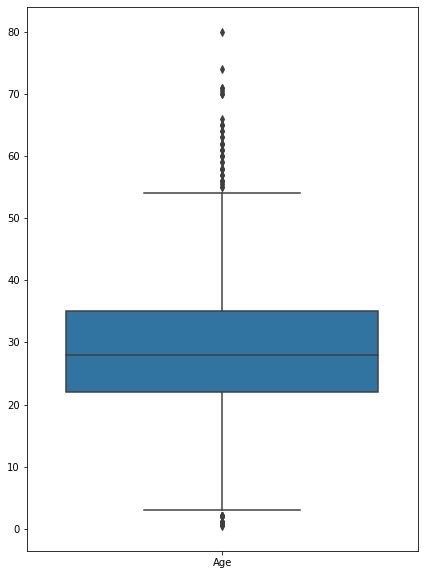

In [14]:
plt.figure(figsize = (7,10))
age = df[['Age']]
sns.boxplot(data = age)
plt.show()

<AxesSubplot:>

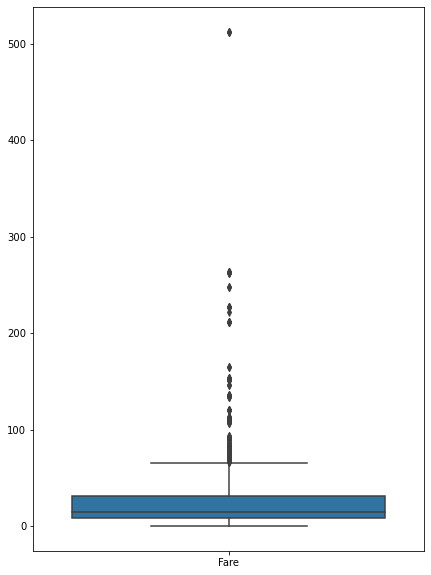

In [15]:
plt.figure(figsize = (7,10))
fare = df[['Fare']]
sns.boxplot(data = fare)

In [16]:
Q1 = np.percentile(df['Fare'],25)
Q2 = np.percentile(df['Fare'],50)
Q3 = np.percentile(df['Fare'],75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print('Upper Limit -',upper_limit, '\nLower Limit -', lower_limit)

outlier = list()

for each in df['Fare']:
    if each < lower_limit or each > upper_limit:
        outlier.append(each)

print('\nOutliers are -',outlier)

dropped_df = df[(df['Fare'] < lower_limit) | (df['Fare'] > upper_limit)].index
df.drop(dropped_df, inplace = True)

Upper Limit - 65.6344 
Lower Limit - -26.724

Outliers are - [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [17]:
Q1 = np.percentile(df['Age'],25)
Q2 = np.percentile(df['Age'],50)
Q3 = np.percentile(df['Age'],75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print('Upper Limit -',upper_limit, '\nLower Limit -', lower_limit)

outlier = list()

for each in df['Age']:
    if each < lower_limit:
        outlier.append(each)

print('\nOutliers are -',outlier)

dropped_df = df[(df['Age'] < lower_limit)].index
df.drop(dropped_df, inplace = True)

Upper Limit - 52.0 
Lower Limit - 4.0

Outliers are - [2.0, 2.0, 3.0, 0.83, 2.0, 1.0, 1.0, 1.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 0.75, 2.0, 2.0, 2.0, 0.75, 0.67, 1.0, 0.42, 2.0, 1.0, 0.83]


In [18]:
df

Survived  Pclass                                          Name  \
PassengerId                                                                   
1                   0       3                       Braund, Mr. Owen Harris   
3                   1       3                        Heikkinen, Miss. Laina   
4                   1       1  Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5                   0       3                      Allen, Mr. William Henry   
6                   0       3                              Moran, Mr. James   
...               ...     ...                                           ...   
887                 0       2                         Montvila, Rev. Juozas   
888                 1       1                  Graham, Miss. Margaret Edith   
889                 0       3      Johnston, Miss. Catherine Helen "Carrie"   
890                 1       1                         Behr, Mr. Karl Howell   
891                 0       3                           Dooley, Mr. Patrick   

                Sex   Age  SibSp  Parch            Ticket     Fare    Cabin  \
PassengerId                                                                   
1              male  22.0      1      0         A/5 21171   7.2500  Unknown   
3            female  26.0      0      0  STON/O2. 3101282   7.9250  Unknown   
4            female  35.0      1      0            113803  53.1000     C123   
5              male  35.0      0      0            373450   8.0500  Unknown   
6              male  28.0      0      0            330877   8.4583  Unknown   
...             ...   ...    ...    ...               ...      ...      ...   
887            male  27.0      0      0            211536  13.0000  Unknown   
888          female  19.0      0      0            112053  30.0000      B42   
889          female  28.0      1      2        W./C. 6607  23.4500  Unknown   
890            male  26.0      0      0            111369  30.0000     C148   
891            male  32.0      0      0            370376   7.7500  Unknown   

            Embarked  
PassengerId           
1                  S  
3                  S  
4                  S  
5                  S  
6                  Q  
...              ...  
887                S  
888                S  
889                S  
890                C  
891                Q  

[747 rows x 11 columns]

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [19]:
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  747.000000  747.000000  747.000000  747.000000  747.000000  747.000000
mean     0.326640    2.473896   29.763052    0.386881    0.303882   17.555945
std      0.469299    0.741566   11.873132    0.826173    0.771492   13.614419
min      0.000000    1.000000    4.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   23.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   28.000000    0.000000    0.000000   12.350000
75%      1.000000    3.000000   34.000000    1.000000    0.000000   26.000000
max      1.000000    3.000000   80.000000    5.000000    6.000000   65.000000

In [20]:
from sklearn import preprocessing

In [21]:
df_new = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
df_new.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  747.000000  747.000000  747.000000  747.000000  747.000000  747.000000
mean     0.326640    2.473896   29.763052    0.386881    0.303882   17.555945
std      0.469299    0.741566   11.873132    0.826173    0.771492   13.614419
min      0.000000    1.000000    4.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   23.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   28.000000    0.000000    0.000000   12.350000
75%      1.000000    3.000000   34.000000    1.000000    0.000000   26.000000
max      1.000000    3.000000   80.000000    5.000000    6.000000   65.000000

In [22]:
min_max = preprocessing.MinMaxScaler(feature_range = (0,1))

In [23]:
df_1 = min_max.fit_transform(df_new)

In [24]:
df_1 = pd.DataFrame(df_1)

In [25]:
df_1

0    1         2    3         4         5
0    0.0  1.0  0.236842  0.2  0.000000  0.111538
1    1.0  1.0  0.289474  0.0  0.000000  0.121923
2    1.0  0.0  0.407895  0.2  0.000000  0.816923
3    0.0  1.0  0.407895  0.0  0.000000  0.123846
4    0.0  1.0  0.315789  0.0  0.000000  0.130128
..   ...  ...       ...  ...       ...       ...
742  0.0  0.5  0.302632  0.0  0.000000  0.200000
743  1.0  0.0  0.197368  0.0  0.000000  0.461538
744  0.0  1.0  0.315789  0.2  0.333333  0.360769
745  1.0  0.0  0.289474  0.0  0.000000  0.461538
746  0.0  1.0  0.368421  0.0  0.000000  0.119231

[747 rows x 6 columns]

In [34]:
y = df_new['Survived']
X = df_new.drop(['Survived'], axis = 1)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [38]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error

print('MSE is: ',mean_squared_error(y_test, predictions))

MSE is:  0.18633392120603964


In [40]:
from sklearn.metrics import r2_score

print('R squared value is -', r2_score(y_test, predictions))

R squared value is - 0.15285649077876495
